# Import the mRNA expression data, calculate adjacency matrix using correlation between samples and build the network using NetworkX library


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [16]:
#import data
df=pd.read_table('GSE39582_Expression.tsv',sep='\t')
dff=df.iloc[:10,:20]# this subdataframe will be used for the rest of the network building 

In [17]:
#compute data_correlation (by default it s the data_adj matrix ): 
data_adj=dff.corr()
#np.fill_diagonal(data_adj.values, 0)
#np.sum((data_corr < 0).values.ravel()) to check if there isnegative correlation

In [18]:
#rescale the data_adj matrix from [-1;1] to a similarity measure [0;1].
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)) 
scaled_values = scaler.fit_transform(data_adj) 
data_adj.loc[:,:] = scaled_values
Drop=np.percentile(data_adj.values.flatten(),75)

In [19]:
#build the network using the correlation as adjacency matrix and save the network to graphml file
data_network = nx.to_networkx_graph(data_adj)
edges=data_network.edges()
degree= dict(data_network.degree(weight = "weight"))
pos=nx.spring_layout(data_network)
weights = [data_network[u][v]['weight'] for u,v in edges]
nx.write_gml(data_network, "Network1.graphml")

In [64]:
#Rescale the weights so that they are more evenly distributed between[0,1] only if you want to rescale only the weights
#from sklearn.preprocessing import MinMaxScaler
#convert the list to 2D array
#weights_array=np.asarray(weights)
#weights_array=weights_array.reshape(-1, 1)
#Rescaling
#scaler = MinMaxScaler(feature_range=(-1, 1))# normalization can be between -1 and 1 
#scaled_values = scaler.fit_transform(weights_array) 
#scaled_weights=list(scaled_values.flat)#2D array to list
#scaled_weights

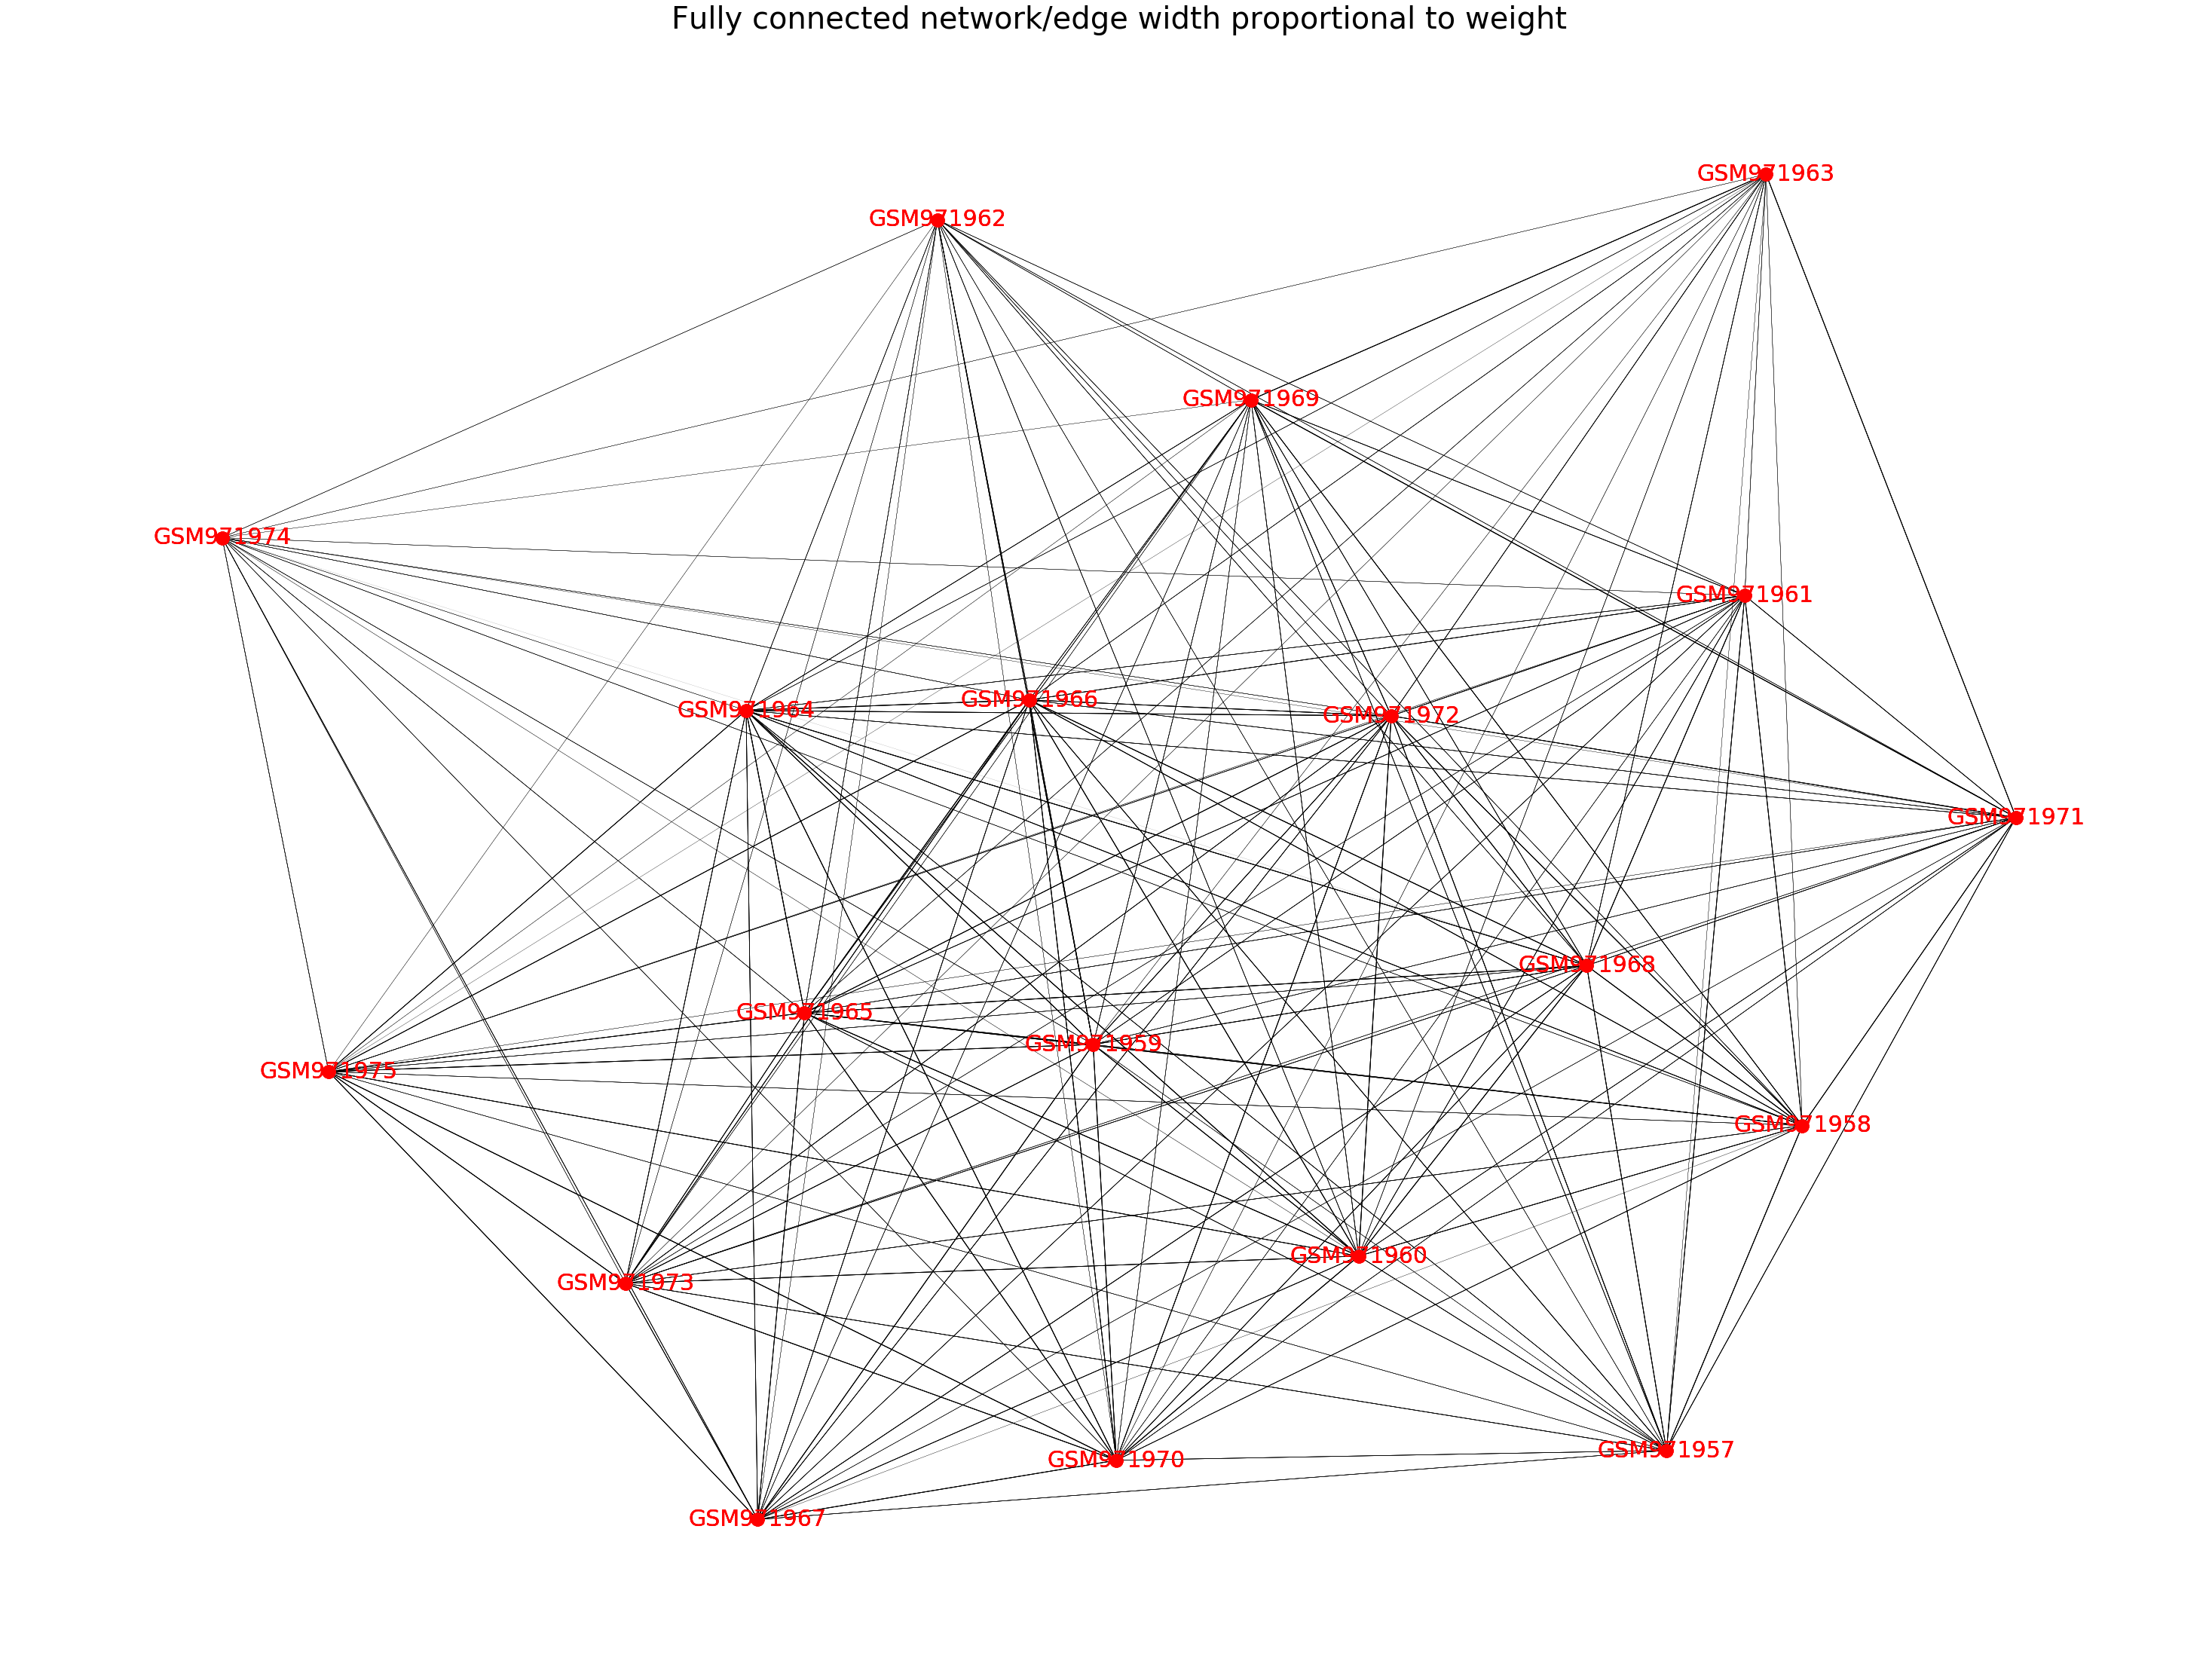

In [64]:
# Draw the nodes and edges using nx.draw : Fully connected network/edge width proportional to weight
plt.rcParams["figure.figsize"] = (40,30)
nx.draw(data_network, pos, edges=edges, width=weights)
labels=data_network.nodes()
label={}
for l in labels:
    label[l]=l
nx.draw_networkx_labels(data_network, pos, labels=label,font_size=30,font_color='red')

plt.title('Fully connected network/edge width proportional to weight',fontsize=40)
plt.show()
#plt.savefig('myfig1')

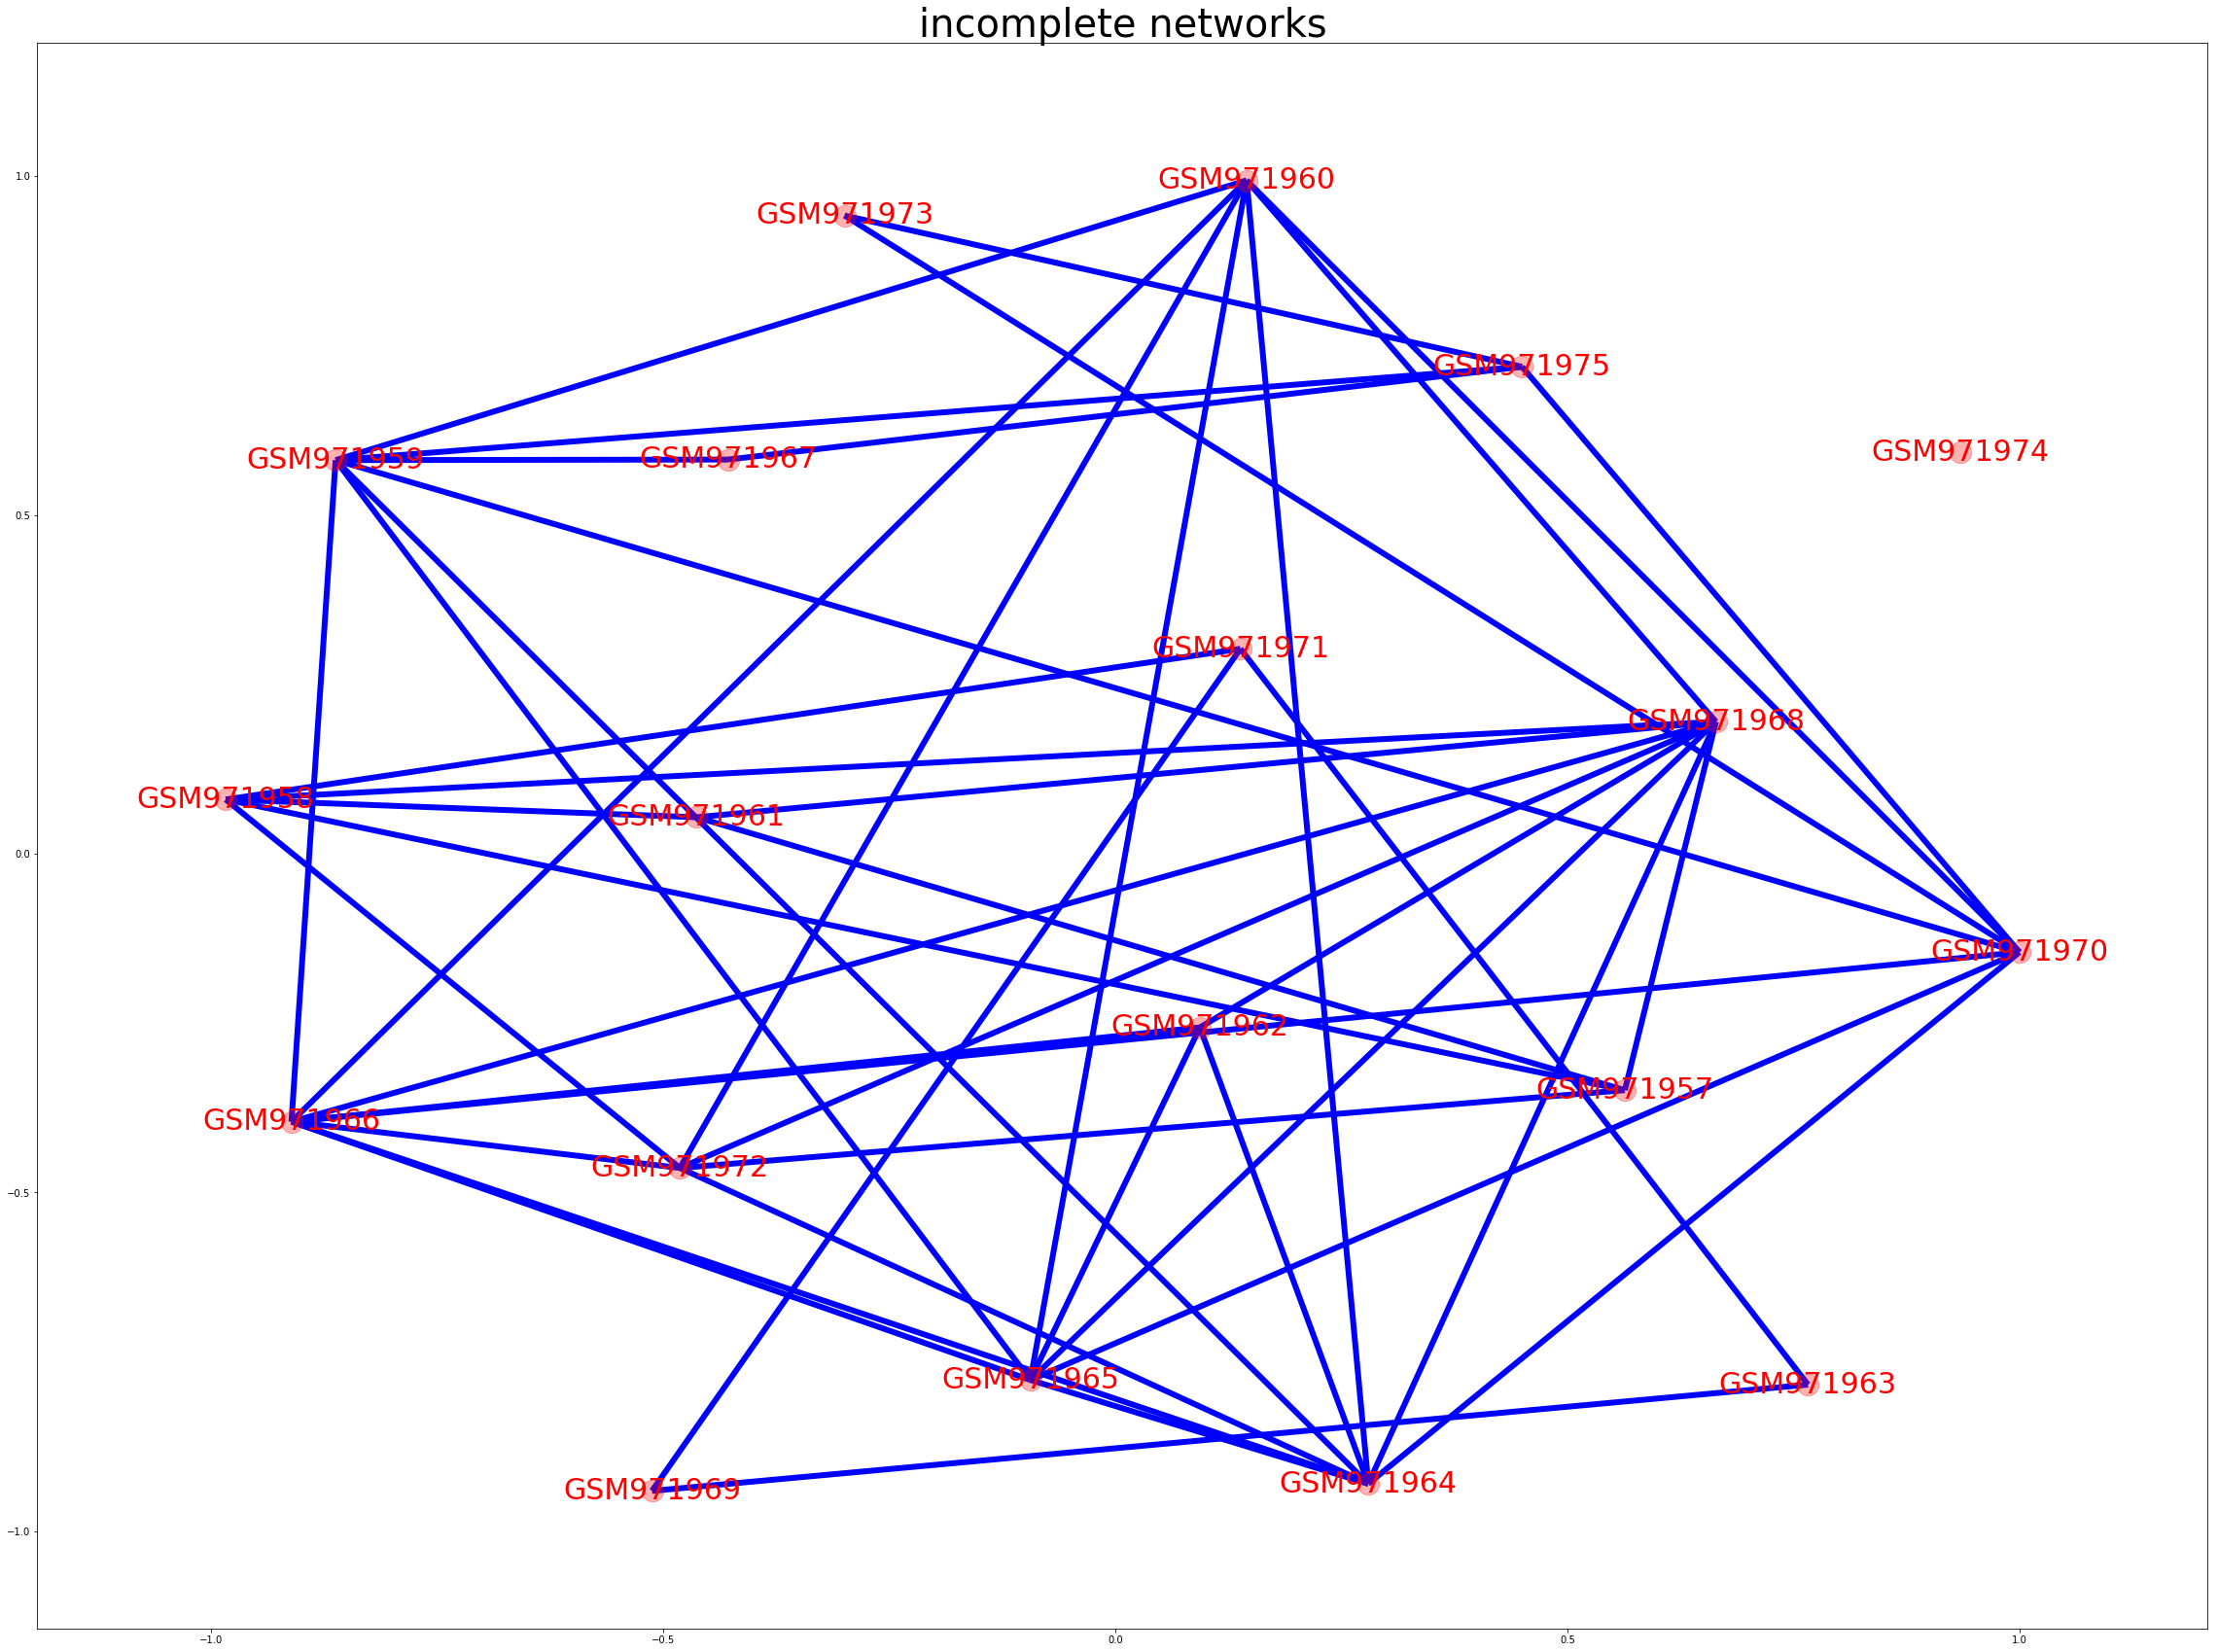

In [10]:
# incomplete networks:drop weights below a predefined threshold
 
Keep_edge=[(u,v) for (u,v,d) in data_network.edges(data=True) if d['weight'] >Drop]

nx.draw_networkx_nodes(data_network,pos, node_color='red', node_size=500, alpha=0.3)
nx.draw_networkx_edges(data_network,pos,edgelist=Keep_edge,edge_color='b',width=6)

labels=data_network.nodes()
label={}
for l in labels:
    label[l]=l
nx.draw_networkx_labels(data_network, pos, labels=label,font_size=30,font_color='red')

plt.rcParams["figure.figsize"] = (40,30)
plt.title('incomplete networks',fontsize=40)
plt.show()
#plt.savefig('myfig2')


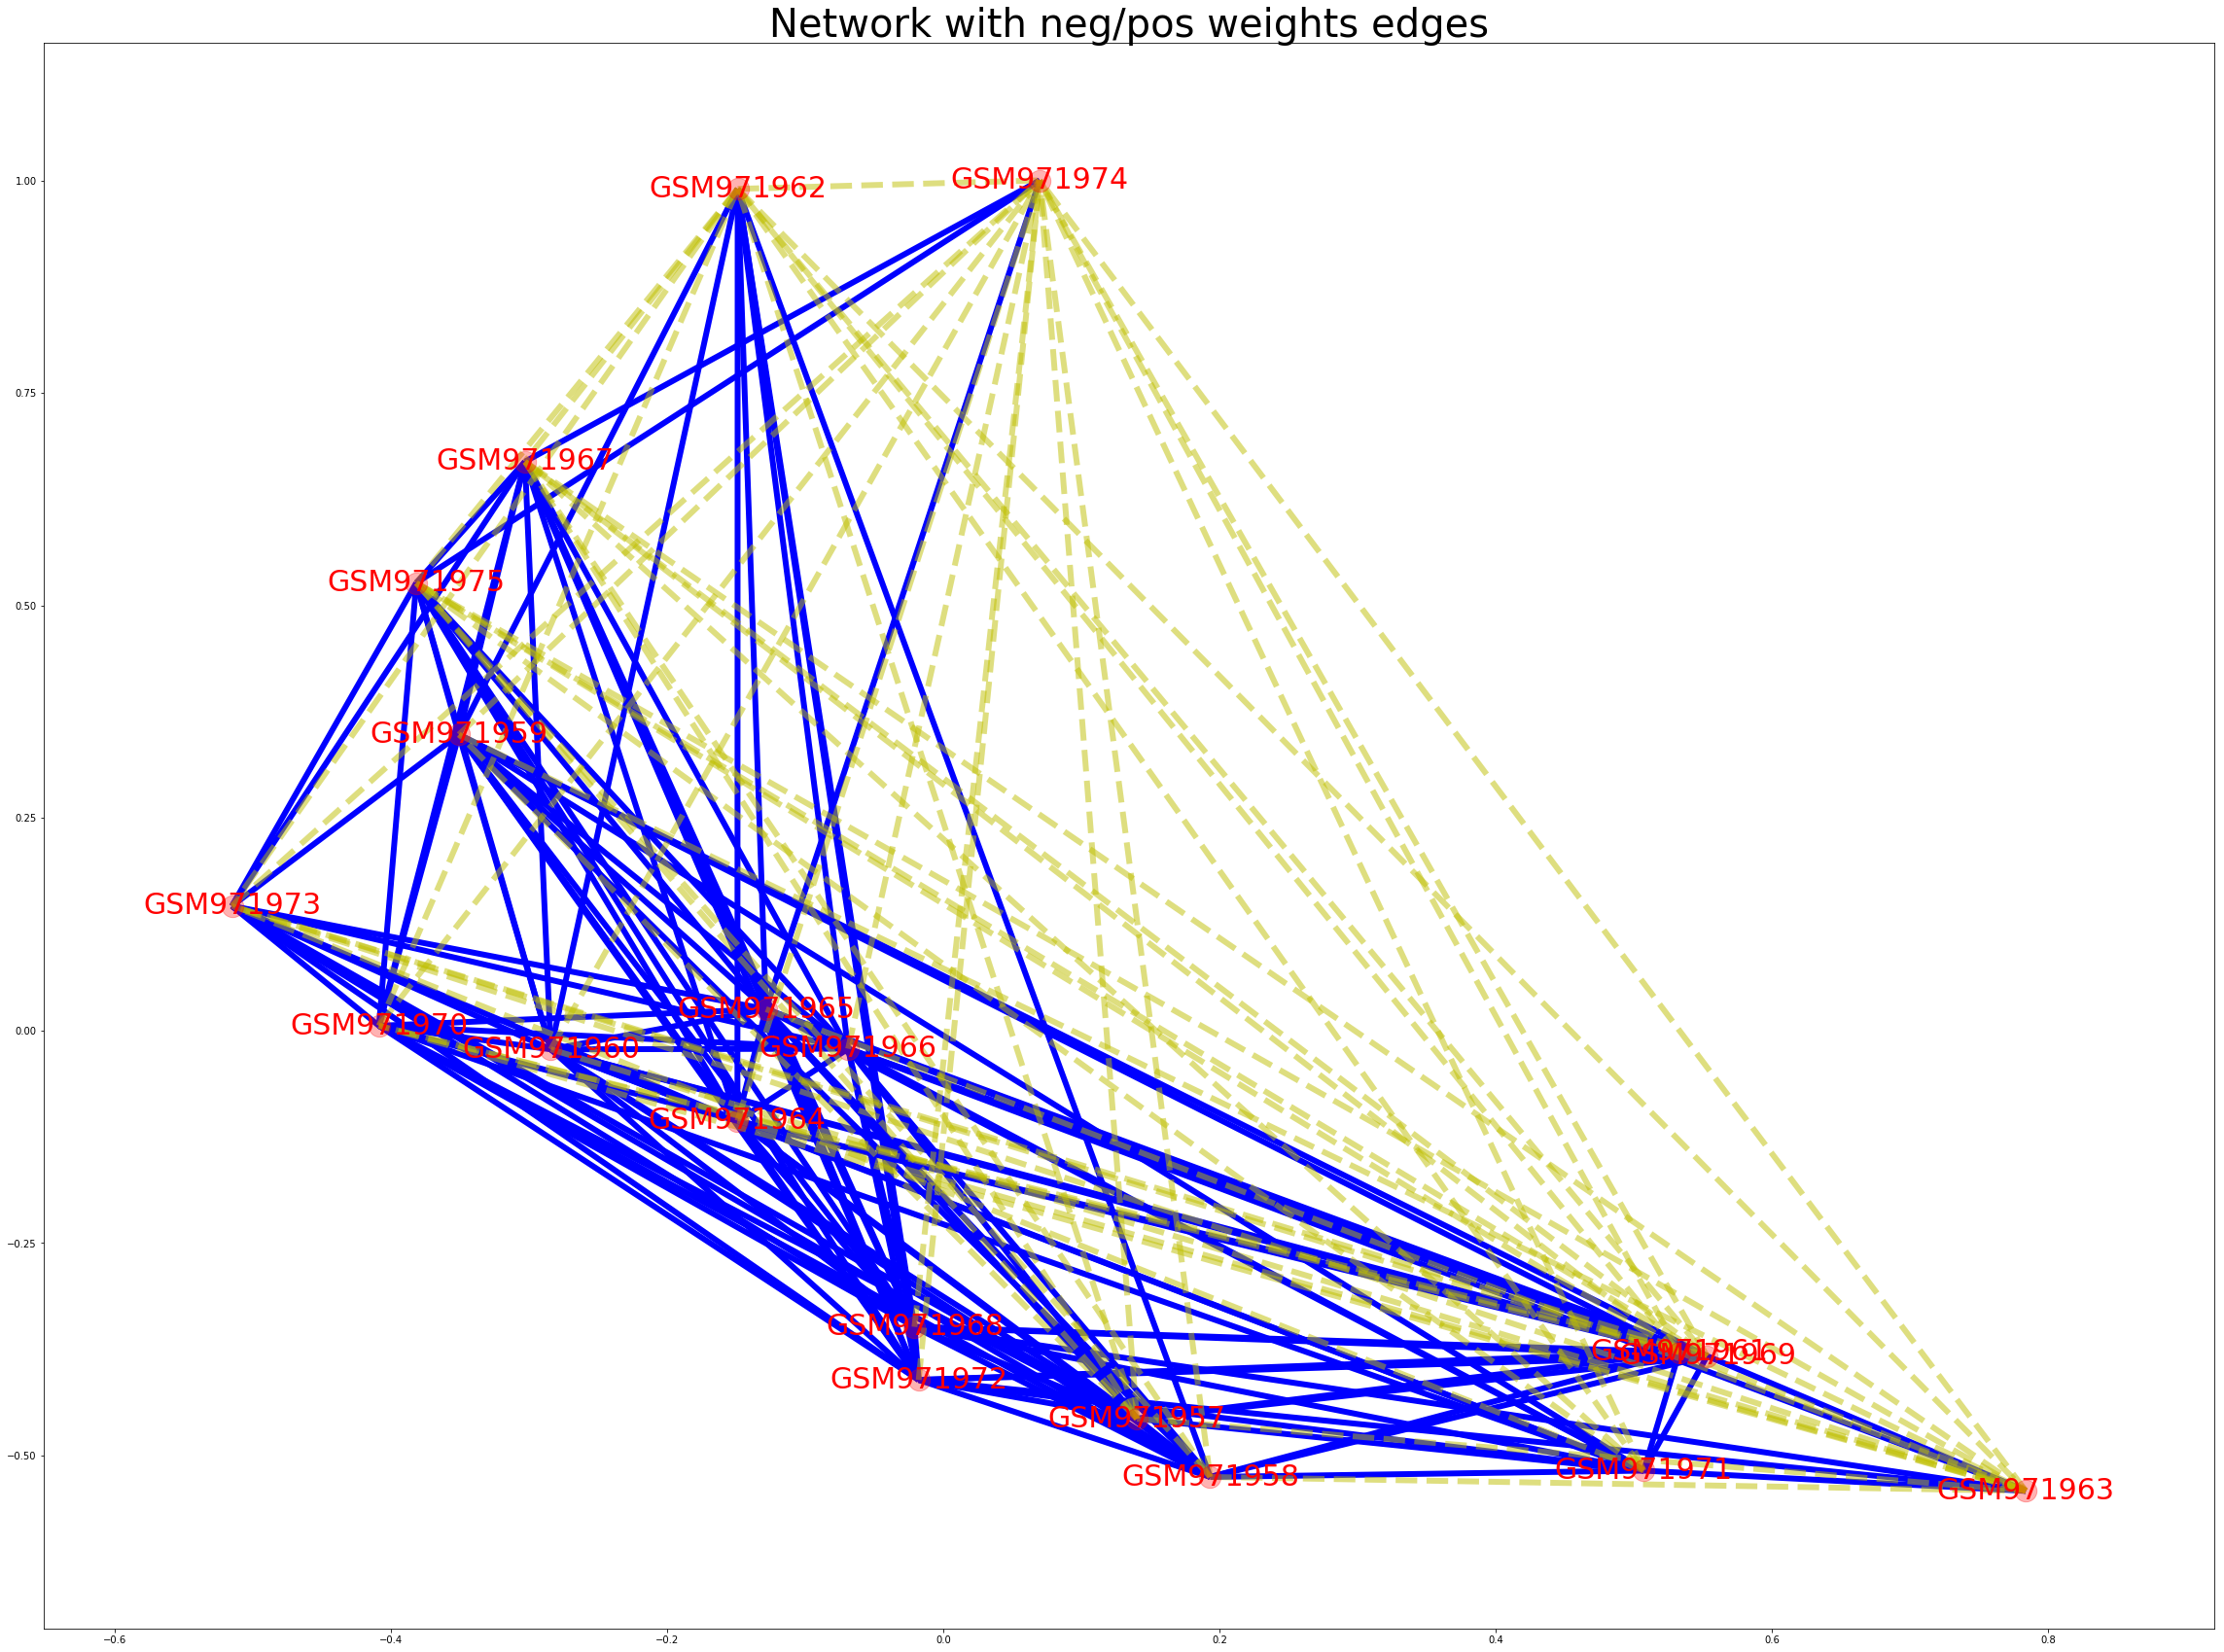

In [20]:
#draw the network nodes then the edges:Network with neg/pos weights edges


Negative_edge=[(u,v) for (u,v,d) in data_network.edges(data=True) if d['weight'] <0]
positive_edge=[(u,v) for (u,v,d) in data_network.edges(data=True) if d['weight'] >0]

nx.draw_networkx_nodes(data_network,pos, node_color='red', node_size=500, alpha=0.3)

nx.draw_networkx_edges(data_network,pos,edgelist=positive_edge,edge_color='blue',
                    width=6)
nx.draw_networkx_edges(data_network,pos,edgelist=Negative_edge,
                    width=6,alpha=0.5,edge_color='y',style='dashed')

labels=data_network.nodes()
label={}
for l in labels:
    label[l]=l
nx.draw_networkx_labels(data_network, pos, labels=label,font_size=30,font_color='red')

plt.rcParams["figure.figsize"] = (40,30)
plt.title('Network with neg/pos weights edges',fontsize=40)
plt.show()
#plt.savefig('myfig4')